## Open Dicke Model: Superradiance of $N$ qubits in an open cavity

Notebook author: Nathan Shammah (nathan.shammah at gmail.com)


We consider a system of $N$ two-level systems (TLSs) coupled to a cavity mode. This is known as the Dicke model 

\begin{eqnarray}
H&=&\omega_{0}J_z +  \omega_{c}a^\dagger a + g\left(a^\dagger + a\right)\left(J_{+} + J_{-}\right)
\end{eqnarray}

where each TLS has identical frequency $\omega_{0}$. The light matter coupling can be in the ultrastrong coupling (USC) regime, $g/\omega_{0}>0.1$.

If we study this model as an open quantum system, the cavity can leak photons at a rate $\kappa$. Moreover, we can introduce the effect of incoherent local and collective processes also on the TLSs. For example the system can be incoherently pumped at a rate $\gamma_\text{P}$, the TLSs are subject to dephasing at a rate $\gamma_\text{D}$, and local incoherent emission occurs at a rate $\gamma_\text{E}$. The dynamics of the coupled light-matter system is governed by

\begin{eqnarray}\dot{\rho} &=& 
-i\lbrack \omega_{0}J_z +  \omega_{a}a^\dagger a + g\left(a^\dagger + a\right)\left(J_{+} + J_{-}\right),\rho \rbrack
+\frac{\kappa}{2}\mathcal{L}_{a}[\rho]
+\sum_{n=1}^{N}\left(\frac{\gamma_\text{P}}{2}\mathcal{L}_{J_{+,n}}[\rho] 
+\frac{\gamma_\text{E}}{2}\mathcal{L}_{J_{+,n}}[\rho]
+\frac{\gamma_\text{D}}{2}\mathcal{L}_{J_{+,n}}[\rho]\right)
\end{eqnarray}

When only the dissipation of the cavity is present, beyond a critical value of the coupling $g$, the steady state of the system becomes superradiant. This is visible by looking at the Wigner function of the photonic part of the density matrix, which displays two displaced lobes in the $x$ and $p$ plane.   

As it has been shown in Ref. [1], the presence of dephasing suppresses the superradiant phase transition, while the presence of local emission restores it [2].

In order to study this system using QuTiP and $\texttt{qutip.piqs}$, we will first build the TLS Liouvillian, then we will build the photonic Liouvillian and finally we will build the light-matter interaction. The total dynamics of the system is thus defined in a Liouvillian space that has both TLS and photonic degrees of freedom. 

Ref. [6] contains a review of the open Dicke model.

In [1]:
import matplotlib as mpl
from matplotlib import cm
import matplotlib.pyplot as plt

from qutip import *
from qutip.piqs import *

In [2]:
#TLS parameters
N = 6
ntls = N
nds = num_dicke_states(ntls)
[jx, jy, jz] = jspin(N)
jp = jspin(N, "+")
jm = jp.dag()
w0 = 1
gE = 0.1
gD = 0.01
gP = 0.1
gCP = 0.1
gCE = 0.1
gCD = 0.1
h = w0 * jz
#photonic parameters
nphot = 16
wc = 1
kappa = 1
ratio_g = 2
g = ratio_g/np.sqrt(N)
a = destroy(nphot)

#TLS liouvillian
system = Dicke(N = N)
system.hamiltonian = h 
system.emission = 0 
system.dephasing = gD
system.pumping = gP
system.collective_pumping = 0
system.collective_emission = 0
system.collective_dephasing = 0
liouv = system.liouvillian() 
system

#TLS liouvillian 2
system2 = Dicke(N = N)
system2.hamiltonian = h 
system2.emission = gE 
system2.dephasing = gD
system2.pumping = 0
system2.collective_pumping = 0
system2.collective_emission = 0
system2.collective_dephasing = 0
liouv2 = system2.liouvillian() 

#TLS liouvillian 3
system3 = Dicke(N = N)
system3.hamiltonian = h 
system3.emission = gE 
system3.dephasing = gD
system3.pumping = 0#gP
system3.collective_pumping = gCP
system3.collective_emission = 0
system3.collective_dephasing = 0
liouv3 = system3.liouvillian() 

#TLS liouvillian 4
system4 = Dicke(N = N)
system4.hamiltonian = h 
system4.emission = gE 
system4.dephasing = gD
system4.pumping = 0
system4.collective_pumping = 0
system4.collective_emission = gCE
system4.collective_dephasing = 0
liouv4 = system4.liouvillian() 
print(system)


N = 6
Hilbert space dim = (16, 16)
Number of Dicke states = 16
Liouvillian space dim = (256, 256)
dephasing = 0.01
pumping = 0.1


In [3]:
#photonic liouvilian
h_phot = wc * a.dag() * a
c_ops_phot = [np.sqrt(kappa) * a]
liouv_phot = liouvillian(h_phot, c_ops_phot)

#identity operators
id_tls = to_super(qeye(nds))
id_phot = to_super(qeye(nphot))

# light-matter superoperator 
h_int = g * tensor(a + a.dag(), jx)
liouv_int = -1j* spre(h_int) + 1j* spost(h_int)

# 1 total liouvillian
liouv_sum = super_tensor(liouv_phot, id_tls) + super_tensor(id_phot, liouv)
liouv_tot = liouv_sum + liouv_int

#2 total liouvillian
liouv_sum2 = super_tensor(liouv_phot, id_tls) + super_tensor(id_phot, liouv2)
liouv_tot2 = liouv_sum2 + liouv_int

#3 total liouvillian
liouv_sum3 = super_tensor(liouv_phot, id_tls) + super_tensor(id_phot, liouv3)
liouv_tot3 = liouv_sum3 + liouv_int

#4 total liouvillian
liouv_sum4 = super_tensor(liouv_phot, id_tls) + super_tensor(id_phot, liouv4)
liouv_tot4 = liouv_sum4 + liouv_int

In [4]:
#total operators
jz_tot = tensor(qeye(nphot), jz)
jp_tot = tensor(qeye(nphot), jp)
jm_tot = tensor(qeye(nphot), jm)
jpjm_tot = tensor(qeye(nphot), jp*jm)
nphot_tot = tensor(a.dag()*a, qeye(nds))
adag_tot = tensor(a.dag(), qeye(nds))
a_tot = tensor(a, qeye(nds))

In [5]:
# 4 calculate steady state
rho_ss4 = steadystate(liouv_tot4, method="direct")
nphot_ss4 = expect(nphot_tot, rho_ss4)
psi4 = rho_ss4.ptrace(0)
print("Ensemble 4 is ok")
# takes a couple of minutes 

Ensemble 4 is ok


In [6]:
# 1 calculate steady state
rho_ss = steadystate(liouv_tot, method="direct")
nphot_ss = expect(nphot_tot, rho_ss)
psi = rho_ss.ptrace(0)

# 2 calculate steady state
rho_ss2 = steadystate(liouv_tot2, method="direct")
nphot_ss2 = expect(nphot_tot, rho_ss2)
psi2 = rho_ss2.ptrace(0)

# 3 calculate steady state
rho_ss3 = steadystate(liouv_tot3, method="direct")
nphot_ss3 = expect(nphot_tot, rho_ss3)
psi3 = rho_ss3.ptrace(0)

# 4 calculate steady state
rho_ss4 = steadystate(liouv_tot4, method="direct")
nphot_ss4 = expect(nphot_tot, rho_ss4)
psi4 = rho_ss4.ptrace(0)


In [7]:
# calculate Wigner function for photonic states
nx = 1000
xvec = np.linspace(-6, 6, nx)
W = wigner(psi, xvec, xvec)
print("1 ok")
W2 = wigner(psi2, xvec, xvec)
print("2 ok")
W3 = wigner(psi3, xvec, xvec)
print("3 ok")
W4 = wigner(psi4, xvec, xvec)
print("4 ok")
# strings for the plot title
g_string = np.round(g,4)
gE_string = np.round(gE,4)
gD_string = np.round(gD,4)
gP_string = np.round(gP,4)
gCE_string = np.round(gCE,4)
gCP_string = np.round(gCP,4)
gCD_string = np.round(gCD,4)
k_string = np.round(kappa,4)

1 ok
2 ok
3 ok
4 ok


### Wigner function Visualization 

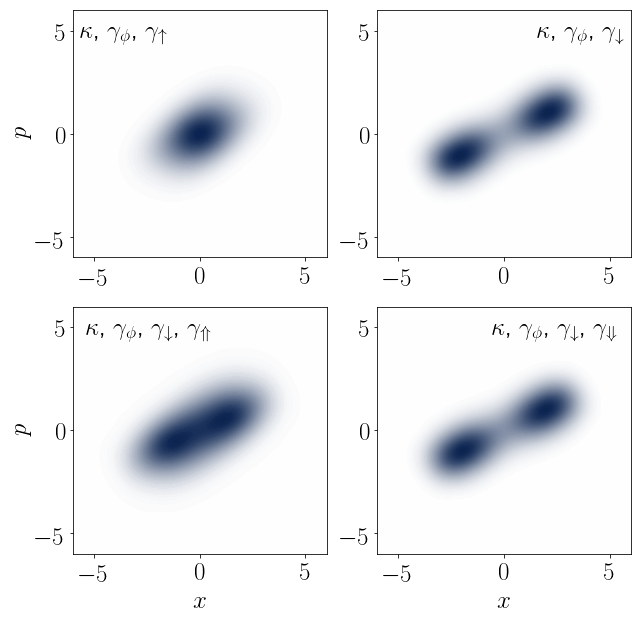

In [8]:
plt.rc('text', usetex = True)
label_size = 25
plt.rc('xtick', labelsize=label_size) 
plt.rc('ytick', labelsize=label_size)

# 1
Wp = np.round(W,3)
wmap = wigner_cmap(Wp)  # Generate Wigner colormap
nrm = mpl.colors.Normalize(0, Wp.max())
# 2
Wp2 = np.round(W2,3)
wmap2 = wigner_cmap(Wp2)  # Generate Wigner colormap
nrm2 = mpl.colors.Normalize(0, Wp2.max())
# 3
Wp3 = np.round(W3,3)
wmap3 = wigner_cmap(Wp3)  # Generate Wigner colormap
nrm3 = mpl.colors.Normalize(0, Wp3.max())
# 4
Wp4 = np.round(W4,3)
wmap4 = wigner_cmap(Wp4)  # Generate Wigner colormap
nrm4 = mpl.colors.Normalize(0, Wp4.max())


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

axes[0,0].contourf(xvec, xvec, Wp, 100, cmap=wmap, norm=nrm)
axes[0,1].contourf(xvec, xvec, Wp2, 100, cmap=wmap2, norm=nrm2)
axes[1,0].contourf(xvec, xvec, Wp3, 100, cmap=wmap3, norm=nrm3)
axes[1,1].contourf(xvec, xvec, Wp4, 100, cmap=wmap4, norm=nrm4)
axes[1,0].set_xlabel(r'$x$', fontsize = label_size)
axes[1,1].set_xlabel(r'$x$', fontsize = label_size)

#axes[0,0].set_ylabel(r'$p$', fontsize = label_size)
axes[0, 0].set_title(r"$\kappa$, $\gamma_\phi$, $\gamma_\uparrow$", 
                     fontsize = label_size, position=(0.2, 0.85))
axes[0, 1].set_title(r"$\kappa$, $\gamma_\phi$, $\gamma_\downarrow$", 
                     fontsize = label_size, position=(0.8, 0.85))
axes[1, 0].set_title(r"$\kappa$, $\gamma_\phi$, $\gamma_\downarrow$, $\gamma_\Uparrow$", 
                     fontsize = label_size, position=(0.3, 0.85))
axes[1, 1].set_title(r"$\kappa$, $\gamma_\phi$, $\gamma_\downarrow$, $\gamma_\Downarrow$", 
                     fontsize = label_size, position=(0.7, 0.85))

axes[0,0].set_xticks([-5,0,5])
axes[0,0].set_yticks([-5,0,5])
axes[0,0].set_ylabel(r'$p$', fontsize = label_size)

axes[0,1].set_xticks([-5,0,5])
axes[0,1].set_yticks([-5,0,5])

axes[1,0].set_ylabel(r'$p$', fontsize = label_size)
axes[1,0].set_xticks([-5,0,5])
axes[1,0].set_yticks([-5,0,5])

axes[1,1].set_xticks([-5,0,5])
axes[1,1].set_yticks([-5,0,5])

plt.show()
plt.close()

The Wigner function of the photonic part of the system displays the two displaced squeezed blobs typical of superradiance depending on the local and collective incoherent terms affecting the dynamics [2,3]. 

In [9]:
rhoss_list = []
rhoss_list.append(rho_ss)
rhoss_list.append(rho_ss2)
rhoss_list.append(rho_ss3)
rhoss_list.append(rho_ss4)
wigner_list = []
wigner_list.append(W)
wigner_list.append(W2)
wigner_list.append(W3)
wigner_list.append(W4)

# save data 
save_file = False
if save_file == True:
    file_name = str("superradiance_rhoss_Nmax{}.npz".format(N))
    np.savez('{}'.format(file_name), rhoss_list)
    file_name = str("superradiance_wigner_list_Nmax{}.npz".format(N))
    np.savez('{}'.format(file_name), wigner_list)


## References

[1] E.G. Dalla Torre *et al.*, *Phys Rev. A* **94**, 061802(R) (2016)

[2] P. Kirton and J. Keeling, *Phys. Rev. Lett.* **118**, 123602 (2017)

[3] N. Shammah, S. Ahmed, N. Lambert, S. De Liberato, and F. Nori, https://arxiv.org/abs/1805.05129

[4] N. Shammah, N. Lambert, F. Nori, and S. De Liberato, *Phys Rev. A* **96**, 023863 (2017)

[5] J. R. Johansson, P. D. Nation, and F. Nori, *Comp. Phys. Comm.* **183**, 1760 (2012) http://qutip.org

[6] P. Kirton, M. M. Roses, J. Keeling, and E. G. Dalla Torre, arXiv:1805.09828 (2018).

In [10]:
qutip.about()


QuTiP: Quantum Toolbox in Python
Copyright (c) 2011 and later.
A. J. Pitchford, P. D. Nation, R. J. Johansson, A. Grimsmo, and C. Granade

QuTiP Version:      4.3.1
Numpy Version:      1.14.2
Scipy Version:      1.1.0
Cython Version:     0.28.5
Matplotlib Version: 2.2.3
Python Version:     3.6.7
Number of CPUs:     2
BLAS Info:          INTEL MKL
OPENMP Installed:   False
INTEL MKL Ext:      True
Platform Info:      Darwin (x86_64)
Installation path:  /Users/nathanshammah/miniconda3/lib/python3.6/site-packages/qutip
Please cite QuTiP in your publication.
For your convenience a bibtex file can be easily generated using `qutip.cite()`
